In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("ijstable.csv")
df.head()


,Char,Unnamed: 1,Unicode,Occurrences,Position,Neg,Neut,Pos,Sentiment score,Sentiment bar,Unicode name,Unicode block
0,NaN,NaN,codepoint,[5...max],[0...1],[0...1],[0...1],[0...1],[-1...+1],(c.i. 95%),NaN,NaN
1,😂,NaN,0x1f602,14622,0.805,0.247,0.285,0.468,0.221,NaN,FACE WITH TEARS OF JOY,Emoticons
2,❤,NaN,0x2764,8050,0.747,0.044,0.166,0.79,0.746,NaN,HEAVY BLACK HEART,Dingbats
3,♥,NaN,0x2665,7144,0.754,0.035,0.272,0.693,0.657,NaN,BLACK HEART SUIT,Miscellaneous Symbols
4,😍,NaN,0x1f60d,6359,0.765,0.052,0.219,0.729,0.678,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons


In [3]:
df.columns


Index(['Char', 'Unnamed: 1', 'Unicode', 'Occurrences', 'Position', 'Neg',
       'Neut', 'Pos', 'Sentiment score', 'Sentiment bar', 'Unicode name',
       'Unicode block'],
      dtype='object')

In [4]:
# Create a new column 'Emotion'
def get_emotion(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Emotion'] = df['Sentiment score'].apply(get_emotion)

# Check result
df[['Char', 'Sentiment score', 'Emotion']].head(10)


TypeError: '>' not supported between instances of 'str' and 'int'

In [5]:
df['Sentiment score'].dtype


dtype('O')

In [6]:
df['Sentiment score'].head()


0    [-1...+1]
1        0.221
2        0.746
3        0.657
4        0.678
Name: Sentiment score, dtype: object

In [7]:
# Step 1: Remove rows where Sentiment score is not a number
df = df[pd.to_numeric(df['Sentiment score'], errors='coerce').notnull()]

# Step 2: Convert column to float
df['Sentiment score'] = df['Sentiment score'].astype(float)

# Step 3: Create Emotion labels
def get_emotion(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Emotion'] = df['Sentiment score'].apply(get_emotion)

# Step 4: Check result
df[['Char', 'Sentiment score', 'Emotion']].head(10)


,Char,Sentiment score,Emotion
1,😂,0.221,Positive
2,❤,0.746,Positive
3,♥,0.657,Positive
4,😍,0.678,Positive
5,😭,-0.093,Negative
6,😘,0.701,Positive
7,😊,0.644,Positive
8,👌,0.563,Positive
9,💕,0.632,Positive
10,👏,0.520,Positive


In [8]:
# Feature: emoji character
X = df['Char']

# Target: Emotion label
y = df['Emotion']


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check mapping
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} --> {i}")


Negative --> 0
Neutral --> 1
Positive --> 2


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char')
X_vec = vectorizer.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = model.predict(X_test)

# Step 3: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7880794701986755

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00         4
           2       0.79      1.00      0.88       119

    accuracy                           0.79       151
   macro avg       0.26      0.33      0.29       151
weighted avg       0.62      0.79      0.69       151



C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

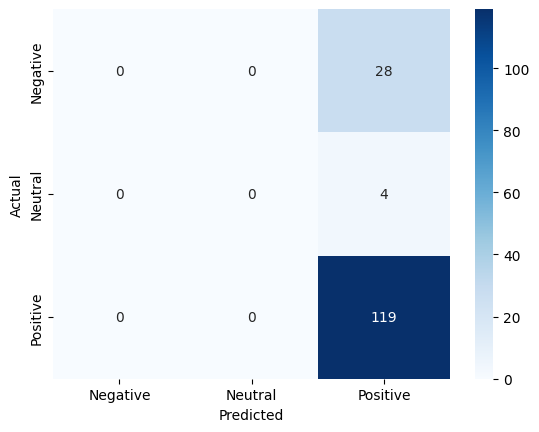

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
# Function to predict emoji emotion
def predict_emoji_emotion(emoji_char):
    vec = vectorizer.transform([emoji_char])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

# Example predictions
print(predict_emoji_emotion("😂"))  # Expect: Positive
print(predict_emoji_emotion("😭"))  # Expect: Negative
print(predict_emoji_emotion("😐"))  # Expect: Neutral (if in dataset)


Positive
Positive
Positive


In [15]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# Step 1: Load Dataset
# Replace with your file name
df = pd.read_csv("ijstable.csv")  # or pd.read_excel("ijstable.xlsx")
df.head()


,Char,Unnamed: 1,Unicode,Occurrences,Position,Neg,Neut,Pos,Sentiment score,Sentiment bar,Unicode name,Unicode block
0,NaN,NaN,codepoint,[5...max],[0...1],[0...1],[0...1],[0...1],[-1...+1],(c.i. 95%),NaN,NaN
1,😂,NaN,0x1f602,14622,0.805,0.247,0.285,0.468,0.221,NaN,FACE WITH TEARS OF JOY,Emoticons
2,❤,NaN,0x2764,8050,0.747,0.044,0.166,0.79,0.746,NaN,HEAVY BLACK HEART,Dingbats
3,♥,NaN,0x2665,7144,0.754,0.035,0.272,0.693,0.657,NaN,BLACK HEART SUIT,Miscellaneous Symbols
4,😍,NaN,0x1f60d,6359,0.765,0.052,0.219,0.729,0.678,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons


In [17]:
# Step 2: Clean and Convert Sentiment Score
# Remove non-numeric rows
df = df[pd.to_numeric(df['Sentiment score'], errors='coerce').notnull()]

# Convert to float
df['Sentiment score'] = df['Sentiment score'].astype(float)


In [18]:
# Step 3: Create Emotion Labels
def get_emotion(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Emotion'] = df['Sentiment score'].apply(get_emotion)

# Preview
df[['Char', 'Sentiment score', 'Emotion']].head(10)


,Char,Sentiment score,Emotion
1,😂,0.221,Positive
2,❤,0.746,Positive
3,♥,0.657,Positive
4,😍,0.678,Positive
5,😭,-0.093,Negative
6,😘,0.701,Positive
7,😊,0.644,Positive
8,👌,0.563,Positive
9,💕,0.632,Positive
10,👏,0.520,Positive


In [19]:
# Step 4: Features and Labels
X = df['Char']
y = df['Emotion']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Label mapping
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} --> {i}")


Negative --> 0
Neutral --> 1
Positive --> 2


In [20]:
# Step 5: Convert Emojis to Features using TF-IDF
vectorizer = TfidfVectorizer(analyzer='char')
X_vec = vectorizer.fit_transform(X)


In [21]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42
)


In [22]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7880794701986755

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00         4
           2       0.79      1.00      0.88       119

    accuracy                           0.79       151
   macro avg       0.26      0.33      0.29       151
weighted avg       0.62      0.79      0.69       151



C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

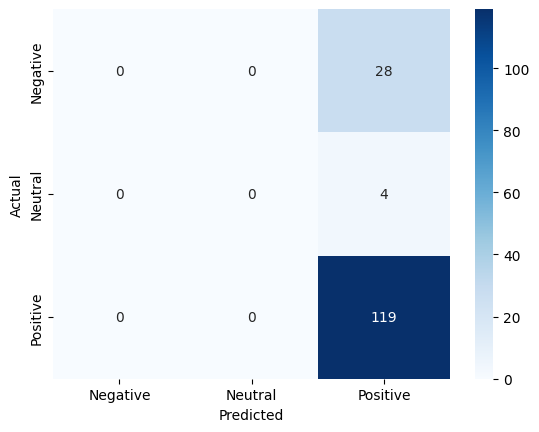

In [23]:
# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
# Step 9: Predict Emotion for New Emojis
def predict_emoji_emotion(emoji_char):
    vec = vectorizer.transform([emoji_char])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

# Examples
print("😂 ->", predict_emoji_emotion("😂"))
print("😭 ->", predict_emoji_emotion("😭"))
print("😐 ->", predict_emoji_emotion("😐"))


😂 -> Positive
😭 -> Positive
😐 -> Positive


In [25]:
df['Emotion'].value_counts()


Emotion
Positive    619
Negative     99
Neutral      33
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [27]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

Accuracy: 0.8211920529801324

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         7
           2       0.82      1.00      0.90       124

    accuracy                           0.82       151
   macro avg       0.27      0.33      0.30       151
weighted avg       0.67      0.82      0.74       151



C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CEX\emoji_emotion_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

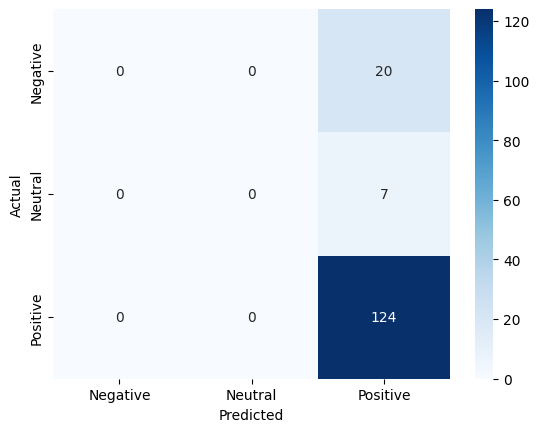

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 2: Train Logistic Regression with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Step 3: Predict
y_pred = model.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         7
           2       0.82      1.00      0.90       124

    accuracy                           0.82       151
   macro avg       0.27      0.33      0.30       151
weighted avg       0.67      0.82      0.74       151



In [30]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: oversampling for imbalanced classes
from imblearn.over_sampling import RandomOverSampler


ModuleNotFoundError: No module named 'imblearn'

In [31]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
# Step 1: Load Dataset
df = pd.read_csv("ijstable.csv")  # or pd.read_excel("ijstable.xlsx")
df.head()


,Char,Unnamed: 1,Unicode,Occurrences,Position,Neg,Neut,Pos,Sentiment score,Sentiment bar,Unicode name,Unicode block
0,NaN,NaN,codepoint,[5...max],[0...1],[0...1],[0...1],[0...1],[-1...+1],(c.i. 95%),NaN,NaN
1,😂,NaN,0x1f602,14622,0.805,0.247,0.285,0.468,0.221,NaN,FACE WITH TEARS OF JOY,Emoticons
2,❤,NaN,0x2764,8050,0.747,0.044,0.166,0.79,0.746,NaN,HEAVY BLACK HEART,Dingbats
3,♥,NaN,0x2665,7144,0.754,0.035,0.272,0.693,0.657,NaN,BLACK HEART SUIT,Miscellaneous Symbols
4,😍,NaN,0x1f60d,6359,0.765,0.052,0.219,0.729,0.678,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons


In [33]:
# Step 2: Clean and Convert Sentiment Score
df = df[pd.to_numeric(df['Sentiment score'], errors='coerce').notnull()]
df['Sentiment score'] = df['Sentiment score'].astype(float)


In [34]:
# Step 3: Create Emotion Labels
def get_emotion(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Emotion'] = df['Sentiment score'].apply(get_emotion)
df[['Char', 'Sentiment score', 'Emotion']].head(10)


,Char,Sentiment score,Emotion
1,😂,0.221,Positive
2,❤,0.746,Positive
3,♥,0.657,Positive
4,😍,0.678,Positive
5,😭,-0.093,Negative
6,😘,0.701,Positive
7,😊,0.644,Positive
8,👌,0.563,Positive
9,💕,0.632,Positive
10,👏,0.520,Positive


In [35]:
# Step 4: Features and Labels
X = df['Char']
y = df['Emotion']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check class mapping
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} --> {i}")


Negative --> 0
Neutral --> 1
Positive --> 2


In [36]:
# Step 5: Convert Emojis to Features using TF-IDF
vectorizer = TfidfVectorizer(analyzer='char')
X_vec = vectorizer.fit_transform(X)


In [37]:
# Step 6: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [38]:
# Step 7: Train Logistic Regression with class_weight='balanced'
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [39]:
# Step 8: Predict & Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.8211920529801324

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         7
           2       0.82      1.00      0.90       124

    accuracy                           0.82       151
   macro avg       0.27      0.33      0.30       151
weighted avg       0.67      0.82      0.74       151



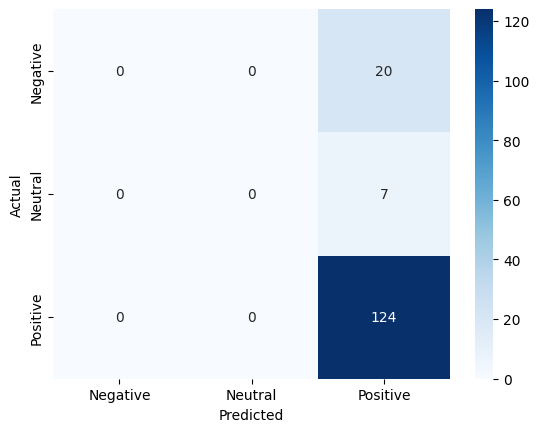

In [40]:
# Step 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
# Step 10: Predict Emotion for New Emojis
def predict_emoji_emotion(emoji_char):
    vec = vectorizer.transform([emoji_char])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

# Examples
print("😂 ->", predict_emoji_emotion("😂"))
print("😭 ->", predict_emoji_emotion("😭"))
print("😐 ->", predict_emoji_emotion("😐"))


😂 -> Positive
😭 -> Negative
😐 -> Positive
